In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data = pd.read_csv("Data/Plus_De_Trou/Plus_De_Trou_m.txt", sep=";")

data.tail()

,mean,stdev,acceptation,E(fitness),sigma(fitness),Generation,fitness1,"Genes(Scores(0,1),:)",fitness50,"Genes(Scores(49,1),:)",fitness100,"Genes(Scores(99,1),:)",Unnamed: 12
595,5,8,0.9,-1947.90,5561.54,95,-61.1761,"[7.49122, -5.19043, -5.81769, -8.62932, -4.31...",-76.6944,"[ 7.49122, -5.19043, 4.10609, 10.4441, -4.3108...",[ -40318.6,"-5.60353, 6.10022, 0.724963, 18.0345, -0.4864...",NaN
596,5,8,0.9,-4073.00,16582.50,96,-62.1833,"[7.49122, -5.19043, -5.81769, 10.4441, -4.310...",-75.2443,"[ 0.397861, -5.19043, -5.81769, -8.62932, -4.3...",[ -121986,"3.90457, 11.1558, 18.3407, 3.36281, -1.66077,...",NaN
597,5,8,0.9,-2513.62,9157.31,97,-59.8710,"[7.49122, -5.19043, -1.80428, 10.4441, -4.310...",-77.0219,"[ 7.49122, -5.19043, -5.81769, -8.62932, -4.31...",[ -58616.9,"5.03137, -5.16915, 18.697, 7.69896, 8.69718, ...",NaN
598,5,8,0.9,-2962.46,9250.87,98,-59.8710,"[7.49122, -5.19043, -1.80428, 10.4441, -4.310...",-79.6193,"[ 7.49122, -5.19043, -5.81769, -8.62932, -4.31...",[ -62806.8,"-1.03654, 3.13925, 7.61193, 8.38017, 1.16521,...",NaN
599,5,8,0.9,-3788.24,14005.60,99,-59.8710,"[7.49122, -5.19043, -1.80428, 10.4441, -4.310...",-75.3119,"[ 7.49122, -5.19043, -5.81769, -8.62932, -4.31...",[ -111169,"0.912088, 11.4401, 10.6597, 8.06489, 0.811058...",NaN


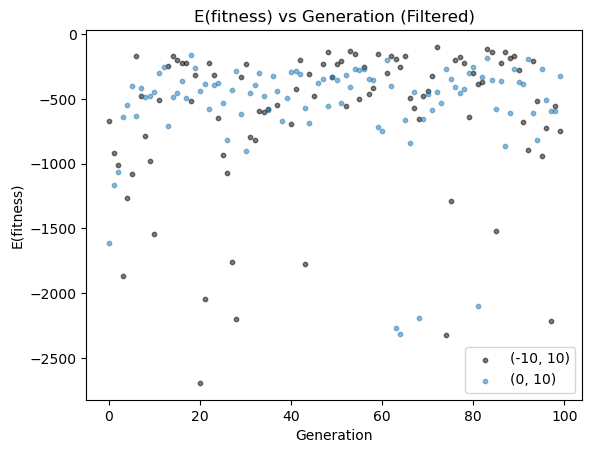

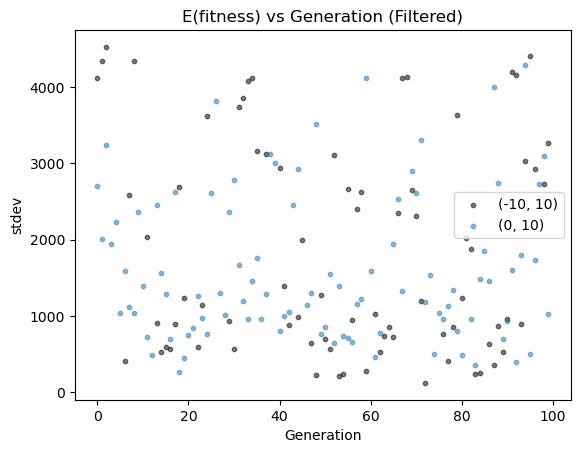

In [48]:
Values = [(-10, 10, -3000, "k"), (0, 10, -3000, "tab:blue")]

for i in range(len(Values)):
    mean = Values[i][0]
    stdev = Values[i][1]
    treshold = Values[i][2]
    color = Values[i][3]
    dataf = data[((data["E(fitness)"] >= treshold) & (data["mean"] == mean) & (data["stdev"] == stdev))]

    plt.scatter(dataf["Generation"], dataf["E(fitness)"], c=color, alpha=0.5, s=10, label=f'({mean}, {stdev})')
plt.xlabel("Generation")
plt.ylabel("E(fitness)")
plt.title("E(fitness) vs Generation (Filtered)")
plt.legend()
plt.show()

for i in range(len(Values)):
    mean = Values[i][0]
    stdev = Values[i][1]
    treshold = Values[i][2]
    color = Values[i][3]
    dataf = data[((data["sigma(fitness)"] <= 5000) & (data["mean"] == mean) & (data["stdev"] == stdev))]

    plt.scatter(dataf["Generation"], dataf["sigma(fitness)"], c=color, alpha=0.5, s=10, label=f'({mean}, {stdev})')
plt.xlabel("Generation")
plt.ylabel("stdev")
plt.title("E(fitness) vs Generation (Filtered)")
plt.legend()
plt.show()

In [3]:
def Visualiser_data(mean, stdev, acceptation, Name):
    A = np.array([])
    B = [str(mean), str(stdev), str(acceptation)]

    df = data[((data["mean"] == mean) & (data["stdev"] == stdev) & (data["acceptation"] == acceptation))]

    mask = (df["Generation"] == 0)

    A = np.array([df[mask]["E(fitness)"], df[mask]["fitness1"], df[mask]["Genes(Scores(0,1),:)"]])
    B.append(str(A[0][0]))
    B.append(str(A[1][0]))
    B.append(A[2,0][2:-2].replace(",",""))


    mask = (df["fitness1"] == df["fitness1"].max())

    A = np.array([df[mask]["E(fitness)"], df[mask]["fitness1"], df[mask]["Genes(Scores(0,1),:)"]])
    B.append(str(A[0][0]))
    B.append(str(A[1][0]))
    B.append(A[2,0][2:-2].replace(",",""))

    mask = (df["Generation"] == df["Generation"].max())

    A = np.array([df[mask]["E(fitness)"], df[mask]["fitness1"], df[mask]["Genes(Scores(0,1),:)"]])
    B.append(str(A[0][0]))
    B.append(str(A[1][0]))
    B.append(A[2,0][2:-2].replace(",",""))

    with open(Name, "w") as file:
        # Write each string to the file
        for string in B:
            file.write(string + "\n")

In [43]:
#stdev = 10 -> mean = -10, 0, 10
#stdev = 8 -> -5,0, 5

mean = 0
stdev = 10
acceptation = 0.9
Name = "test.txt"
Visualiser_data(mean, stdev, acceptation, Name)